In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---

Uploading the data from google drive


---


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
match = pd.read_csv("/content/drive/MyDrive/IPL_Matches_2008_2022.csv")
deliveries = pd.read_csv("/content/drive/MyDrive/IPL_Ball_by_Ball_2008_2022.csv")

In [6]:
match

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [7]:
match.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [8]:
deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [9]:
match.shape


(950, 20)

In [10]:
deliveries.shape

(225954, 17)

In [11]:
total_score = deliveries.groupby(['ID','innings']).sum()['total_run'].reset_index()

<ipython-input-11-b4b902843d1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score = deliveries.groupby(['ID','innings']).sum()['total_run'].reset_index()


In [12]:
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [13]:
ts_inning1=total_score[total_score['innings'] == 1]
ts_inning2=total_score[total_score['innings'] == 2]

In [14]:
match_df = match.merge(ts_inning1[['ID','total_run']],left_on='ID',right_on='ID')

In [15]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240




---


*Replacing* **old team names** with **new team names** and *eliminating* **obsolete teams**


---



In [16]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [17]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [18]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [19]:
Teams = ['Chennai Super Kings','Royal Challengers Bangalore','Mumbai Indians','Kolkata Knight Riders','Sunrisers Hyderabad','Rajasthan Royals','Delhi Capitals','Gujarat Titans','Punjab Kings','Lucknow Super Giants']

In [20]:
match_df = match_df[match_df['Team1'].isin(Teams)]
match_df = match_df[match_df['Team2'].isin(Teams)]
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [21]:
match_df.shape

(835, 21)

In [22]:
for col in match_df.columns:
    print(col)

ID
City
Date
Season
MatchNumber
Team1
Team2
Venue
TossWinner
TossDecision
SuperOver
WinningTeam
WonBy
Margin
method
Player_of_Match
Team1Players
Team2Players
Umpire1
Umpire2
total_run


In [23]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [24]:
#Removing the matches where the Duckworth Lewis Method was applied
match_df = match_df[match_df['method'] != 'D/L']
match_df['method'].unique()

array([nan], dtype=object)

In [25]:
match_df=match_df[['ID','Venue','WinningTeam','total_run','Team1','Team2','TossWinner']]

In [26]:
merged= match_df.merge(deliveries,on='ID')
merged=merged[merged['innings']==2]
merged

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,5,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196450,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,6,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196451,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,7,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196452,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,15,1,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [27]:
merged['BattingTeam'] = merged['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
merged['WinningTeam'] = merged['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

merged['BattingTeam'] = merged['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
merged['WinningTeam'] = merged['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

merged['BattingTeam'] = merged['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')
merged['WinningTeam'] = merged['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

merged = merged[merged['BattingTeam'].isin(Teams)]
merged = merged[merged['WinningTeam'].isin(Teams)]



In [28]:
merged['runs_scored_till_now'] = merged.groupby('ID').cumsum()['total_run_y']

<ipython-input-28-1f2120ff7572>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged['runs_scored_till_now'] = merged.groupby('ID').cumsum()['total_run_y']


In [29]:

merged['runs_to_chase'] = merged['total_run_x']-merged['runs_scored_till_now']

In [30]:
merged.columns

Index(['ID', 'Venue', 'WinningTeam', 'total_run_x', 'Team1', 'Team2',
       'TossWinner', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'runs_scored_till_now',
       'runs_to_chase'],
      dtype='object')

In [31]:
merged['balls_remaining']=120-((merged['overs'])*6 + merged['ballnumber'])



---

For win/loss column

---





---


 FOR WICKETS




---



In [32]:
merged['player_out']=merged['player_out'].fillna(0)
merged['player_out'] = merged['player_out'].apply(lambda x:x if x == 0 else 1)
merged['player_out'].unique()

array([0, 1])

In [33]:
w = merged.groupby('ID').cumsum()['player_out'].values
merged['wickets taken'] = w
merged['wickets left'] = 10-w
merged.head()

<ipython-input-33-5ab883faca19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w = merged.groupby('ID').cumsum()['player_out'].values


,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,0,NaN,NaN,Gujarat Titans,0,130,119,0,10
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,0,NaN,NaN,Gujarat Titans,0,130,118,0,10
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,0,0,NaN,NaN,Gujarat Titans,1,129,117,0,10
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,0,0,NaN,NaN,Gujarat Titans,1,129,116,0,10
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,0,0,NaN,NaN,Gujarat Titans,1,129,115,0,10


In [34]:
def won(x):
  return 1 if x['BattingTeam'] == x['WinningTeam'] else 0

In [35]:
def tosswon(x):
  return 1 if x['BattingTeam'] == x['TossWinner'] else 0

In [36]:
merged['Tosswin'] = merged.apply(tosswon, axis=1)

merged.head()

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,player_out,kind,fielders_involved,BattingTeam,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left,Tosswin
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,NaN,NaN,Gujarat Titans,0,130,119,0,10,0
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,NaN,NaN,Gujarat Titans,0,130,118,0,10,0
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,0,NaN,NaN,Gujarat Titans,1,129,117,0,10,0
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,0,NaN,NaN,Gujarat Titans,1,129,116,0,10,0
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,0,NaN,NaN,Gujarat Titans,1,129,115,0,10,0


In [37]:
homeground_dict = {
    'Chennai Super Kings': ['JSCA International Stadium Complex', 'MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharashtra Cricket Association Stadium',
 'Maharashtra Cricket Association Stadium, Pune'],
    'Mumbai Indians': ['Wankhede Stadium','Wankhede Stadium, Mumbai' ,'Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy' ,'Brabourne Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Brabourne Stadium, Mumbai' ],
    'Royal Challengers Bangalore': ['M Chinnaswamy Stadium', 'M.Chinnaswamy Stadium'],
    'Delhi Capitals': ['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi', 'Shaheed Veer Narayan Singh International Stadium'],
    'Punjab Kings': ['Barabati Stadium','Maharashtra Cricket Association Stadium', 'Maharashtra Cricket Association Stadium, Pune', 'Holkar Cricket Stadium'],
    'Rajasthan Royals': ['Sawai Mansingh Stadium', 'Narendra Modi Stadium, Ahmedabad','Brabourne Stadium', 'Brabourne Stadium, Mumbai'],
    'Kolkata Knight Riders': ['Eden Gardens, Kolkata','JSCA International Stadium Complex','Barabati Stadium'],
    'Sunrisers Hyderabad': [ 'Rajiv Gandhi International Stadium', 'Rajiv Gandhi International Stadium, Uppal','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'],
    'Gujarat Titans': ['Narendra Modi Stadium, Ahmedabad'],
    'Lucknow Super Giants': []
}


In [38]:
merged['homeground_advantage'] = merged.apply(lambda x: 1 if x['Venue'] in homeground_dict.get(x['BattingTeam'], []) else 0, axis=1)

In [39]:
#crr= runs scored / overs
merged['crr']= (merged['runs_scored_till_now']*6)/(120-(merged['balls_remaining']))
#rrr= runs left/ over left
merged['rrr']= (merged['runs_to_chase']*6)/(merged['balls_remaining'])

In [40]:
merged = merged[merged['rrr'] > 0]

In [41]:
merged['result'] = merged.apply(won, axis=1)
merged.head()

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left,Tosswin,homeground_advantage,crr,rrr,result
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,130,119,0,10,0,1,0.0,6.554622,1
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,130,118,0,10,0,1,0.0,6.610169,1
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,1,129,117,0,10,0,1,2.0,6.615385,1
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,1,129,116,0,10,0,1,1.5,6.672414,1
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,1,129,115,0,10,0,1,1.2,6.730435,1


In [42]:
merged

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left,Tosswin,homeground_advantage,crr,rrr,result
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,130,119,0,10,0,1,0.000000,6.554622,1
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,130,118,0,10,0,1,0.000000,6.610169,1
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,1,129,117,0,10,0,1,2.000000,6.615385,1
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,1,129,116,0,10,0,1,1.500000,6.672414,1
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,1,129,115,0,10,0,1,1.200000,6.730435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,5,...,80,142,31,9,1,1,1,5.393258,27.483871,0
196450,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,6,...,81,141,30,9,1,1,1,5.400000,28.200000,0
196451,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,7,...,81,141,29,9,1,1,1,5.340659,29.172414,0
196452,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,15,1,...,82,140,29,9,1,1,1,5.406593,28.965517,0




---
For current run rate and required run rate

---




In [43]:
for col in merged.columns:
    print(col)

ID
Venue
WinningTeam
total_run_x
Team1
Team2
TossWinner
innings
overs
ballnumber
batter
bowler
non-striker
extra_type
batsman_run
extras_run
total_run_y
non_boundary
isWicketDelivery
player_out
kind
fielders_involved
BattingTeam
runs_scored_till_now
runs_to_chase
balls_remaining
wickets taken
wickets left
Tosswin
homeground_advantage
crr
rrr
result


In [44]:
cricket_table = merged[['ID','Team2','Team1','Venue','runs_scored_till_now',
'runs_to_chase','balls_remaining','wickets left','total_run_x','crr','rrr','result','Tosswin',"homeground_advantage"]]

cricket_table.rename(columns={'Team1':'BowlingTeam'},inplace=True)
cricket_table.rename(columns={'Team2':'BattingTeam'},inplace=True)
cricket_table.dropna(inplace=True)
cricket_table = cricket_table.sample(cricket_table.shape[0])



<ipython-input-44-42c11946951d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_table.rename(columns={'Team1':'BowlingTeam'},inplace=True)
<ipython-input-44-42c11946951d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_table.rename(columns={'Team2':'BattingTeam'},inplace=True)
<ipython-input-44-42c11946951d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_table.dropna(inplace=True)


In [45]:
merged

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left,Tosswin,homeground_advantage,crr,rrr,result
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,130,119,0,10,0,1,0.000000,6.554622,1
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,130,118,0,10,0,1,0.000000,6.610169,1
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,1,129,117,0,10,0,1,2.000000,6.615385,1
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,1,129,116,0,10,0,1,1.500000,6.672414,1
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,1,129,115,0,10,0,1,1.200000,6.730435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,5,...,80,142,31,9,1,1,1,5.393258,27.483871,0
196450,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,6,...,81,141,30,9,1,1,1,5.400000,28.200000,0
196451,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,7,...,81,141,29,9,1,1,1,5.340659,29.172414,0
196452,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,15,1,...,82,140,29,9,1,1,1,5.406593,28.965517,0


In [46]:
cricket_table

,ID,BattingTeam,BowlingTeam,Venue,runs_scored_till_now,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,result,Tosswin,homeground_advantage
47795,1181764,Mumbai Indians,Chennai Super Kings,MA Chidambaram Stadium,44,87,83,8,131,7.135135,6.289157,1,0,0
166433,419121,Punjab Kings,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",7,129,110,10,136,4.200000,7.036364,0,1,1
139870,548336,Royal Challengers Bangalore,Rajasthan Royals,Sawai Mansingh Stadium,68,121,59,9,189,6.688525,12.305085,0,1,1
102479,829707,Delhi Capitals,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",85,65,44,7,150,6.710526,8.863636,0,0,0
86354,980953,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",173,21,4,5,194,8.948276,31.500000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78997,1082612,Mumbai Indians,Punjab Kings,Holkar Cricket Stadium,2,196,118,10,198,6.000000,9.966102,1,1,0
104848,734031,Delhi Capitals,Mumbai Indians,Wankhede Stadium,156,17,2,6,173,7.932203,51.000000,0,0,0
2424,1304111,Mumbai Indians,Sunrisers Hyderabad,"Wankhede Stadium, Mumbai",175,18,6,3,193,9.210526,18.000000,0,1,1
58746,1175367,Rajasthan Royals,Chennai Super Kings,MA Chidambaram Stadium,138,37,17,4,175,8.038835,13.058824,0,1,0


In [47]:
summary_table= cricket_table[cricket_table['balls_remaining']==0]
summary_table=summary_table[['ID','BattingTeam','BowlingTeam','runs_scored_till_now','total_run_x','crr','result',"wickets left",'Venue']]


In [48]:
import matplotlib.pyplot as plt


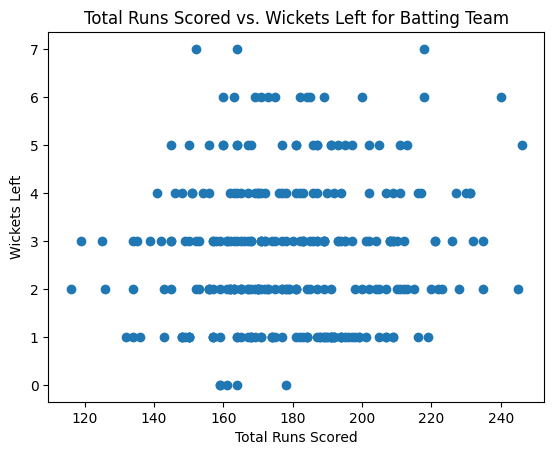

In [49]:
plt.scatter(summary_table['total_run_x'], summary_table['wickets left'])
plt.xlabel('Total Runs Scored')
plt.ylabel('Wickets Left')
plt.title('Total Runs Scored vs. Wickets Left for Batting Team')
plt.show()

In [50]:
team_summary = summary_table.groupby('BattingTeam').agg({'ID': 'count', 'total_run_x': 'mean'})

# Rename the columns
team_summary = team_summary.rename(columns={'ID': 'MatchesPlayed', 'total_run_x': 'RunsPerMatch'})

# Display the summary table
print(team_summary)

                             MatchesPlayed  RunsPerMatch
BattingTeam                                             
Chennai Super Kings                     23    183.652174
Delhi Capitals                          36    178.250000
Gujarat Titans                           2    183.000000
Kolkata Knight Riders                   37    177.162162
Lucknow Super Giants                     4    182.750000
Mumbai Indians                          39    175.897436
Punjab Kings                            37    179.918919
Rajasthan Royals                        32    177.156250
Royal Challengers Bangalore             32    186.312500
Sunrisers Hyderabad                     45    178.844444


In [51]:
import seaborn as sns


In [52]:
cricket_table['crr'].value_counts()

6.000000     2693
0.000000     1075
8.000000     1039
9.000000     1000
7.500000      791
             ... 
10.396040       1
10.260000       1
6.350000        1
14.068966       1
11.605263       1
Name: crr, Length: 5628, dtype: int64

In [53]:
cricket_table['rrr'].value_counts()

6.000000     943
12.000000    807
9.000000     771
8.000000     459
10.000000    363
            ... 
11.926829      1
19.052632      1
3.468750       1
3.823009       1
21.166667      1
Name: rrr, Length: 9235, dtype: int64

In [54]:
min_value = cricket_table['crr'].min()
max_value = cricket_table['crr'].max()

# Print the range of values
print("Range of values: {} - {}".format(min_value, max_value))

Range of values: 0.0 - 36.0


In [55]:
cricket_table = cricket_table.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
cricket_table = cricket_table.dropna(subset=['rrr'])

In [56]:
min_value = cricket_table['rrr'].min()
max_value = cricket_table['rrr'].max()

# Print the range of values
print("Range of values: {} - {}".format(min_value, max_value))

Range of values: 0.08333333333333333 - 708.0


In [57]:
cricket_table['BattingTeam'].unique()

array(['Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [58]:
sorted(cricket_table['Venue'].unique())

['Arun Jaitley Stadium',
 'Arun Jaitley Stadium, Delhi',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Brabourne Stadium, Mumbai',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr DY Patil Sports Academy, Mumbai',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Eden Gardens, Kolkata',
 'Feroz Shah Kotla',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M.Chinnaswamy Stadium',
 'MA Chidambaram Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'MA Chidambaram Stadium, Chepauk, Chennai',
 'Maharashtra Cricket Association Stadium',
 'Maharashtra Cricket Association Stadium, Pune',
 'Narendra Modi Stadium, Ahmedabad',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cri

In [59]:
cricket_table.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets left', 'total_run_x',
       'crr', 'rrr', 'result', 'Tosswin', 'homeground_advantage'],
      dtype='object')

In [60]:
cricket_table = cricket_table[['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets left', 'total_run_x',
       'crr', 'rrr', 'Tosswin', 'homeground_advantage', 'result']]

In [61]:
cricket_table=cricket_table.sample(cricket_table.shape[0])

In [62]:
cricket_table.sample()

,ID,BattingTeam,BowlingTeam,Venue,runs_scored_till_now,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage,result
179307,392201,Delhi Capitals,Sunrisers Hyderabad,SuperSport Park,12,136,109,10,148,6.545455,7.486239,0,0,1


In [63]:
X = cricket_table.iloc[:,:-1]
Y = cricket_table.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [64]:
X_train

,ID,BattingTeam,BowlingTeam,Venue,runs_scored_till_now,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage
85352,980971,Delhi Capitals,Punjab Kings,"Punjab Cricket Association IS Bindra Stadium, ...",136,45,25,7,181,8.589474,10.800000,0,0
67127,1136596,Sunrisers Hyderabad,Delhi Capitals,Rajiv Gandhi International Stadium,67,96,75,10,163,8.933333,7.680000,0,1
53664,1178407,Rajasthan Royals,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,131,51,20,6,182,7.860000,15.300000,1,0
38179,1216512,Sunrisers Hyderabad,Kolkata Knight Riders,Sheikh Zayed Stadium,85,78,49,6,163,7.183099,9.551020,1,0
160611,419145,Sunrisers Hyderabad,Royal Challengers Bangalore,M Chinnaswamy Stadium,58,126,72,9,184,7.250000,10.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189825,336009,Chennai Super Kings,Delhi Capitals,Feroz Shah Kotla,98,89,62,8,187,10.137931,8.612903,1,0
4521,1304102,Mumbai Indians,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",81,84,53,7,165,7.253731,9.509434,1,1
131628,548380,Chennai Super Kings,Delhi Capitals,"MA Chidambaram Stadium, Chepauk",43,179,87,8,222,7.818182,12.344828,0,0
166033,419123,Chennai Super Kings,Royal Challengers Bangalore,M Chinnaswamy Stadium,107,64,25,5,171,6.757895,15.360000,1,0


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ("trf",OneHotEncoder(sparse=False,drop="first"),["BattingTeam","BowlingTeam","Venue"])
]
,remainder = "passthrough")


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [67]:
pipe = Pipeline(steps=[
    ("step1",trf),
    ("step2",LogisticRegression(solver="liblinear"))
])

In [68]:
pipe.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'Venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [69]:
Y_pred=pipe.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7665673864482502

In [71]:
pipe.predict_proba(X_test)[4]

array([0.72124728, 0.27875272])

In [72]:
cricket_table.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets left', 'total_run_x',
       'crr', 'rrr', 'Tosswin', 'homeground_advantage', 'result'],
      dtype='object')

In [73]:
merged

,ID,Venue,WinningTeam,total_run_x,Team1,Team2,TossWinner,innings,overs,ballnumber,...,runs_scored_till_now,runs_to_chase,balls_remaining,wickets taken,wickets left,Tosswin,homeground_advantage,crr,rrr,result
120,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,1,...,0,130,119,0,10,0,1,0.000000,6.554622,1
121,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,2,...,0,130,118,0,10,0,1,0.000000,6.610169,1
122,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,3,...,1,129,117,0,10,0,1,2.000000,6.615385,1
123,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,4,...,1,129,116,0,10,0,1,1.500000,6.672414,1
124,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,2,0,5,...,1,129,115,0,10,0,1,1.200000,6.730435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,5,...,80,142,31,9,1,1,1,5.393258,27.483871,0
196450,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,6,...,81,141,30,9,1,1,1,5.400000,28.200000,0
196451,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,14,7,...,81,141,29,9,1,1,1,5.340659,29.172414,0
196452,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,2,15,1,...,82,140,29,9,1,1,1,5.406593,28.965517,0


In [74]:
def filter_match_data(x_df):

    match = x_df[x_df['ballnumber'] == 6]
    return match

In [75]:
filter_match_data(merged).columns

Index(['ID', 'Venue', 'WinningTeam', 'total_run_x', 'Team1', 'Team2',
       'TossWinner', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets taken', 'wickets left',
       'Tosswin', 'homeground_advantage', 'crr', 'rrr', 'result'],
      dtype='object')

In [76]:
match=filter_match_data(merged)

In [77]:
merged.rename(columns={'Team1': 'BowlingTeam'}, inplace=True)

In [78]:
match=filter_match_data(merged)

In [79]:
match.columns

Index(['ID', 'Venue', 'WinningTeam', 'total_run_x', 'BowlingTeam', 'Team2',
       'TossWinner', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets taken', 'wickets left',
       'Tosswin', 'homeground_advantage', 'crr', 'rrr', 'result'],
      dtype='object')

In [80]:
def filter_temp_data(match_df):
    temp_df = match_df[['ID','BattingTeam', 'BowlingTeam', 'Venue', 'runs_to_chase', 'balls_remaining', 'wickets left', 'total_run_x', 'crr', 'rrr', 'Tosswin', 'homeground_advantage','runs_scored_till_now','result']].dropna()

    return temp_df

In [81]:
 filter_temp_data(match)

,ID,BattingTeam,BowlingTeam,Venue,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage,runs_scored_till_now,result
125,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",125,114,10,130,5.000000,6.578947,0,1,5,1
131,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,108,9,130,5.500000,6.611111,0,1,11,1
137,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,102,9,130,3.666667,7.000000,0,1,11,1
143,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",108,96,9,130,5.500000,6.750000,0,1,22,1
150,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",106,90,8,130,4.800000,7.066667,0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196425,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,166,54,3,222,5.090909,18.444444,1,1,56,0
196431,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,163,48,2,222,4.916667,20.375000,1,1,59,0
196437,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,153,42,2,222,5.307692,21.857143,1,1,69,0
196444,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,145,36,1,222,5.500000,24.166667,1,1,77,0


In [82]:
temp_df = filter_temp_data(match)

In [83]:
temp_df.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_to_chase',
       'balls_remaining', 'wickets left', 'total_run_x', 'crr', 'rrr',
       'Tosswin', 'homeground_advantage', 'runs_scored_till_now', 'result'],
      dtype='object')

In [84]:
temp_df['rrr'] = temp_df['rrr'].replace([np.inf, -np.inf], np.nan)

# Remove rows with NaN values
temp_df = temp_df.dropna(subset=['rrr'])

In [85]:
temp_df.describe()

,ID,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage,runs_scored_till_now,result
count,1.467100e+04,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000,14671.000000
mean,8.404693e+05,92.276259,62.493082,7.554359,165.284984,7.433420,9.870707,0.487424,0.207280,73.008725,0.524777
std,3.475839e+05,48.158860,31.914034,2.079772,28.672044,1.988035,6.076654,0.499859,0.405371,44.630007,0.499403
min,3.359820e+05,1.000000,6.000000,0.000000,67.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000
25%,5.012600e+05,54.000000,36.000000,6.000000,147.000000,6.307692,7.166667,0.000000,0.000000,36.000000,0.000000
50%,8.297390e+05,91.000000,66.000000,8.000000,165.000000,7.473684,8.875000,0.000000,0.000000,70.000000,1.000000
75%,1.178426e+06,128.000000,90.000000,9.000000,185.000000,8.611111,10.947368,1.000000,0.000000,107.000000,1.000000
max,1.312200e+06,232.000000,114.000000,10.000000,246.000000,21.000000,122.000000,1.000000,1.000000,222.000000,1.000000


In [86]:
def predict_results(temp_df, pipe):
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    return temp_df

In [87]:
predict_results(temp_df,pipe)

,ID,BattingTeam,BowlingTeam,Venue,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage,runs_scored_till_now,result,lose,win
125,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",125,114,10,130,5.000000,6.578947,0,1,5,1,10.4,89.6
131,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,108,9,130,5.500000,6.611111,0,1,11,1,11.5,88.5
137,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,102,9,130,3.666667,7.000000,0,1,11,1,17.2,82.8
143,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",108,96,9,130,5.500000,6.750000,0,1,22,1,14.3,85.7
150,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",106,90,8,130,4.800000,7.066667,0,1,24,1,19.4,80.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196425,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,166,54,3,222,5.090909,18.444444,1,1,56,0,99.4,0.6
196431,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,163,48,2,222,4.916667,20.375000,1,1,59,0,99.6,0.4
196437,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,153,42,2,222,5.307692,21.857143,1,1,69,0,99.6,0.4
196444,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,145,36,1,222,5.500000,24.166667,1,1,77,0,99.6,0.4


In [88]:
temp_df.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_to_chase',
       'balls_remaining', 'wickets left', 'total_run_x', 'crr', 'rrr',
       'Tosswin', 'homeground_advantage', 'runs_scored_till_now', 'result',
       'lose', 'win'],
      dtype='object')

In [89]:
def calculate_metrics(temp_df):
    temp_df['ID'] = temp_df['ID']
    temp_df['runs_to_chase'] = temp_df['runs_to_chase']
    temp_df['runs_scored_till_now'] =temp_df['runs_scored_till_now']
    temp_df['result'] = temp_df['result']
    temp_df['BattingTeam'] =temp_df['BattingTeam']
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_to_chase'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]
    return temp_df, target

In [90]:
calculate_metrics(temp_df)

(             ID                  BattingTeam                  BowlingTeam  \
 125     1312200               Gujarat Titans             Rajasthan Royals   
 131     1312200               Gujarat Titans             Rajasthan Royals   
 137     1312200               Gujarat Titans             Rajasthan Royals   
 143     1312200               Gujarat Titans             Rajasthan Royals   
 150     1312200               Gujarat Titans             Rajasthan Royals   
 ...         ...                          ...                          ...   
 196425   335982  Royal Challengers Bangalore  Royal Challengers Bangalore   
 196431   335982  Royal Challengers Bangalore  Royal Challengers Bangalore   
 196437   335982  Royal Challengers Bangalore  Royal Challengers Bangalore   
 196444   335982  Royal Challengers Bangalore  Royal Challengers Bangalore   
 196450   335982  Royal Challengers Bangalore  Royal Challengers Bangalore   
 
                                    Venue  runs_to_chase  ball

In [91]:
temp_df.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_to_chase',
       'balls_remaining', 'wickets left', 'total_run_x', 'crr', 'rrr',
       'Tosswin', 'homeground_advantage', 'runs_scored_till_now', 'result',
       'lose', 'win', 'end_of_over', 'runs_after_over', 'wickets_in_over'],
      dtype='object')

In [92]:
temp_df

,ID,BattingTeam,BowlingTeam,Venue,runs_to_chase,balls_remaining,wickets left,total_run_x,crr,rrr,Tosswin,homeground_advantage,runs_scored_till_now,result,lose,win,end_of_over,runs_after_over,wickets_in_over
125,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",125,114,10,130,5.000000,6.578947,0,1,5,1,10.4,89.6,1,5,0
131,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,108,9,130,5.500000,6.611111,0,1,11,1,11.5,88.5,2,6,1
137,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",119,102,9,130,3.666667,7.000000,0,1,11,1,17.2,82.8,3,0,0
143,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",108,96,9,130,5.500000,6.750000,0,1,22,1,14.3,85.7,4,11,0
150,1312200,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",106,90,8,130,4.800000,7.066667,0,1,24,1,19.4,80.6,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196425,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,166,54,3,222,5.090909,18.444444,1,1,56,0,99.4,0.6,14667,6,0
196431,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,163,48,2,222,4.916667,20.375000,1,1,59,0,99.6,0.4,14668,3,1
196437,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,153,42,2,222,5.307692,21.857143,1,1,69,0,99.6,0.4,14669,10,0
196444,335982,Royal Challengers Bangalore,Royal Challengers Bangalore,M Chinnaswamy Stadium,145,36,1,222,5.500000,24.166667,1,1,77,0,99.6,0.4,14670,8,1


In [93]:
def get_target_and_progression(x_df, pipe):
    y, target = calculate_metrics(temp_df)
    return target, y[['ID', 'runs_scored_till_now', 'wickets left', 'lose', 'win']]


In [94]:
get_target_and_progression(merged,pipe)

(130,
              ID  runs_scored_till_now  wickets left  lose   win
 125     1312200                     5            10  10.4  89.6
 131     1312200                    11             9  11.5  88.5
 137     1312200                    11             9  17.2  82.8
 143     1312200                    22             9  14.3  85.7
 150     1312200                    24             8  19.4  80.6
 ...         ...                   ...           ...   ...   ...
 196425   335982                    56             3  99.4   0.6
 196431   335982                    59             2  99.6   0.4
 196437   335982                    69             2  99.6   0.4
 196444   335982                    77             1  99.6   0.4
 196450   335982                    81             1  99.7   0.3
 
 [14671 rows x 5 columns])

In [95]:
def match_progression(x_df, pipe):
    target, progression = get_target_and_progression(x_df, pipe)
    print("Target -", target)
    return progression

In [96]:
match_progress=match_progression(temp_df,pipe)

Target - 130


In [97]:
#for a specific match
match_progress[match_progress['ID'] == 335982]

,ID,runs_scored_till_now,wickets left,lose,win
196358,335982,4,10,96.5,3.5
196365,335982,9,9,97.0,3.0
196371,335982,11,8,98.0,2.0
196378,335982,16,8,98.3,1.7
196384,335982,24,7,98.3,1.7
196390,335982,26,6,98.8,1.2
196396,335982,29,6,99.1,0.9
196404,335982,38,5,99.1,0.9
196410,335982,41,4,99.3,0.7
196418,335982,50,3,99.3,0.7


In [98]:
match_progress=match_progression(temp_df,pipe)

Target - 130


In [99]:
#for a specific match
match_progress[match_progress['ID'] == 1312200]

,ID,runs_scored_till_now,wickets left,lose,win
125,1312200,5,10,10.4,89.6
131,1312200,11,9,11.5,88.5
137,1312200,11,9,17.2,82.8
143,1312200,22,9,14.3,85.7
150,1312200,24,8,19.4,80.6
158,1312200,31,8,19.9,80.1
164,1312200,35,8,23.6,76.4
170,1312200,38,8,29.1,70.9
176,1312200,48,8,26.1,73.9
182,1312200,54,8,28.0,72.0


In [100]:
temp_df.columns

Index(['ID', 'BattingTeam', 'BowlingTeam', 'Venue', 'runs_to_chase',
       'balls_remaining', 'wickets left', 'total_run_x', 'crr', 'rrr',
       'Tosswin', 'homeground_advantage', 'runs_scored_till_now', 'result',
       'lose', 'win', 'end_of_over', 'runs_after_over', 'wickets_in_over'],
      dtype='object')

In [101]:
merged.columns

Index(['ID', 'Venue', 'WinningTeam', 'total_run_x', 'BowlingTeam', 'Team2',
       'TossWinner', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'runs_scored_till_now',
       'runs_to_chase', 'balls_remaining', 'wickets taken', 'wickets left',
       'Tosswin', 'homeground_advantage', 'crr', 'rrr', 'result'],
      dtype='object')

In [102]:
match_progress.columns

Index(['ID', 'runs_scored_till_now', 'wickets left', 'lose', 'win'], dtype='object')

In [103]:
columns_to_keep=['runs_scored_till_now','wickets left','Tosswin','homeground_advantage']
x=X_train[columns_to_keep]

y=Y_train


In [104]:
model=pd.merge(x,y,left_index=True, right_index=True)

In [105]:
x.corr()

,runs_scored_till_now,wickets left,Tosswin,homeground_advantage
runs_scored_till_now,1.000000,-0.626337,0.018082,-0.008962
wickets left,-0.626337,1.000000,-0.011284,0.034960
Tosswin,0.018082,-0.011284,1.000000,0.085099
homeground_advantage,-0.008962,0.034960,0.085099,1.000000


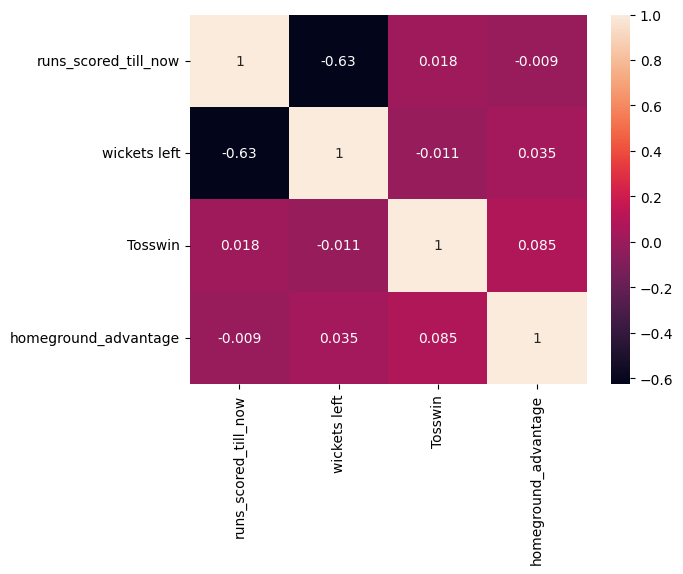

In [106]:
sns.heatmap(x.corr(),annot=True)
plt.show()

Since correlation coefficient between wickets left and runs scored till now seems to be a bit high we want to check for multicolinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


In [109]:
vif_data

,Feature,VIF
0,runs_scored_till_now,2.195768
1,wickets left,2.671283
2,Tosswin,1.924088
3,homeground_advantage,1.269096


Since VIF<10 for all Features, we conclude that there is no significant multicolinearity and we proceed with calculating the coefficients

In [110]:
from sklearn.linear_model import LogisticRegression
import numpy as np

coefficients

In [111]:
logreg = LogisticRegression()

In [112]:
logreg.fit(x, y)

LogisticRegression()

In [113]:
coefficients = logreg.coef_[0]
intercept = logreg.intercept_
column_names = x.columns

In [114]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.0199045  0.67239382 0.21182614 0.46862698]
Intercept: [-6.66840008]


In [115]:
x.columns

Index(['runs_scored_till_now', 'wickets left', 'Tosswin',
       'homeground_advantage'],
      dtype='object')

In [116]:
for feature, coef in zip(column_names, coefficients):
    print(f'{feature}: {coef}')

runs_scored_till_now: 0.019904504092820532
wickets left: 0.672393818698541
Tosswin: 0.21182614243977133
homeground_advantage: 0.4686269763955855


In [117]:
Coefficients_df = pd.DataFrame()
Coefficients_df['Feature'] = x.columns
Coefficients_df['Coefficients']= coefficients

In [118]:
Coefficients_df

,Feature,Coefficients
0,runs_scored_till_now,0.019905
1,wickets left,0.672394
2,Tosswin,0.211826
3,homeground_advantage,0.468627


Logistic Regression

In [119]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix


In [120]:
cm = confusion_matrix(y_true = Y_test, y_pred = Y_pred,labels = (1,0))

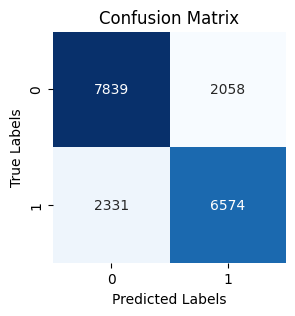

In [121]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


plt.show()

In [122]:
tp, fn ,fp ,tn = confusion_matrix(y_true = Y_test, y_pred = Y_pred,labels = (1,0)).ravel()


In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [124]:
precision_score(Y_test, Y_pred)

0.7707964601769911

In [125]:
recall_score(Y_test, Y_pred)

0.7920581994543802

In [126]:
f1_score(Y_test, Y_pred)

0.7812827029451338

In [127]:
accuracy_score(Y_test, Y_pred)

0.7665673864482502

Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
pipe1 = Pipeline(steps=[
    ("step1", trf),
    ("step2",RandomForestClassifier())
])

In [130]:
pipe1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'Venue'])])),
                ('step2', RandomForestClassifier())])

In [131]:
y1_pred  = pipe1.predict(X_test)

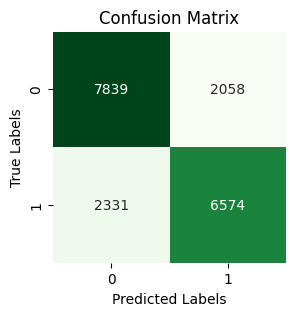

In [132]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true = Y_test, y_pred = y1_pred,labels = (1,0))
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


plt.show()

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision_score(Y_test, y1_pred)

1.0

In [134]:
recall_score(Y_test, y1_pred)

0.9991916742447207

In [135]:
f1_score(Y_test, y1_pred)

0.999595673708683

In [136]:
accuracy_score(Y_test, y1_pred)

0.9995745133496436

Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
pipe2 = Pipeline(steps=[
    ("step1", trf),
    ("step2", DecisionTreeClassifier())
])

In [148]:
pipe2.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'Venue'])])),
                ('step2', DecisionTreeClassifier())])

In [149]:
y2_pred  = pipe2.predict(X_test)

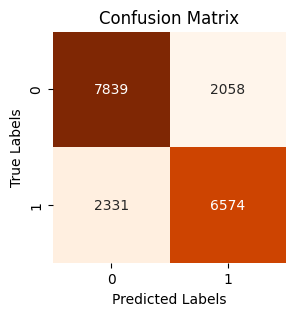

In [150]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true = Y_test, y_pred = y2_pred,labels = (1,0))
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


plt.show()

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision_score(Y_test, y2_pred)

0.9950319375443577

In [152]:
recall_score(Y_test, y2_pred)

0.9916136202889765

In [153]:
f1_score(Y_test,y2_pred)

0.9933198380566801

In [154]:
accuracy_score(Y_test,y2_pred)

0.9929794702691203